# Análisis Exploratorio (Divorcios)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Leemos los datos del CSV

In [2]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

#Configurar pandas para que muestre todas las filas
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('Divorcios.csv')

<small>

Haremos una exploración rápida de los datos, para ello estaremos trabajando un resumen del conjunto de datos.

Primero, separaremos qué variables con cuantitativas y cuáles son cualitativas.

</small>

In [17]:
# Lista de variables cuantitativas (numéricas)
quantitative_columns = [
    "AÑOREG",  # Año de registro
    "DIAOCU",  # Día de ocurrencia
    "MESOCU",  # Mes de ocurrencia
    "EDADHOM",  # Edad del hombre
    "EDADMUJ"   # Edad de la mujer
]

# Lista de variables cualitativas (categóricas)
cualitative_columns = [
    "DEPREG",  # Departamento de registro
    "MUPREG",  # Municipio de registro
    "MESREG",  # Mes de registro
    "DEPOCU",  # Departamento de ocurrencia
    "MUPOCU",  # Municipio de ocurrencia
    "PUEHOM",  # Pueblo de pertenencia del hombre
    "PUEMUJ",  # Pueblo de pertenencia de la mujer
    "NACHOM",  # Nacionalidad del hombre
    "NACMUJ",  # Nacionalidad de la mujer
    "ESCHOM",  # Escolaridad del hombre
    "ESCMUJ",  # Escolaridad de la mujer
    "CIUOHOM",  # Ocupación del hombre
    "CIUOMUJ"   # Ocupación de la mujer
]

<small>Usamos `data.describe()` en Python para obtener un resumen estadístico rápido de los datos en un DataFrame de pandas. Este método proporciona información esencial como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada columna numérica. Esto nos ayuda a entender mejor la distribución y las características generales de los datos, identificar posibles valores atípicos y guiar el análisis exploratorio de datos.</small>


In [12]:
data[quantitative_columns].describe()

,AÑOREG,DIAOCU,MESOCU,EDADHOM,EDADMUJ
count,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000
mean,2014.241794,15.610045,6.269417,608.684305,599.638924
std,0.428208,8.750767,3.320067,473.159166,476.279065
min,2014.000000,1.000000,1.000000,17.000000,16.000000
25%,2014.000000,8.000000,3.000000,36.000000,33.000000
50%,2014.000000,15.000000,6.000000,999.000000,999.000000
75%,2014.000000,23.000000,9.000000,999.000000,999.000000
max,2015.000000,31.000000,12.000000,999.000000,999.000000


<small>
El método `pd.info()` en pandas se utiliza para obtener un resumen conciso de un DataFrame. Proporciona información sobre:

- El número de filas y columnas.
- Los nombres de las columnas
- El tipo de datos de cada columna.
- El número de valores no nulos en cada columna.

Esto es útil para entender rápidamente la estructura y las características básicas del conjunto de datos antes de realizar un análisis más profundo.
</small>


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEPREG   5575 non-null   int64 
 1   MUPREG   5575 non-null   int64 
 2   MESREG   5575 non-null   int64 
 3   AÑOREG   5575 non-null   int64 
 4   DIAOCU   5575 non-null   int64 
 5   MESOCU   5575 non-null   int64 
 6   DEPOCU   5575 non-null   int64 
 7   MUPOCU   5575 non-null   int64 
 8   EDADHOM  5575 non-null   int64 
 9   EDADMUJ  5575 non-null   int64 
 10  PUEHOM   5575 non-null   int64 
 11  PUEMUJ   5575 non-null   int64 
 12  NACHOM   5575 non-null   int64 
 13  NACMUJ   5575 non-null   int64 
 14  ESCHOM   5575 non-null   int64 
 15  ESCMUJ   5575 non-null   int64 
 16  CIUOHOM  5575 non-null   object
 17  CIUOMUJ  5575 non-null   object
dtypes: int64(16), object(2)
memory usage: 784.1+ KB
None


<small>`isnull().sum()` nos sirve para saber la suma de cuántos valores son nulos para cada columna de nuestro dataset.</small>

In [6]:
print(data.isnull().sum())

DEPREG     0
MUPREG     0
MESREG     0
AÑOREG     0
DIAOCU     0
MESOCU     0
DEPOCU     0
MUPOCU     0
EDADHOM    0
EDADMUJ    0
PUEHOM     0
PUEMUJ     0
NACHOM     0
NACMUJ     0
ESCHOM     0
ESCMUJ     0
CIUOHOM    0
CIUOMUJ    0
dtype: int64


<small>Ahora que ya sabemos cuántos datos faltan, sería mucho mejor saber cuánto porcentaje de ellos falta:</small>


In [20]:
# Porcentaje de datos faltantes por columna
missing_data = (data.isnull().sum() / len(data)) * 100
print(missing_data)

DEPREG     0.0
MUPREG     0.0
MESREG     0.0
AÑOREG     0.0
DIAOCU     0.0
MESOCU     0.0
DEPOCU     0.0
MUPOCU     0.0
EDADHOM    0.0
EDADMUJ    0.0
PUEHOM     0.0
PUEMUJ     0.0
NACHOM     0.0
NACMUJ     0.0
ESCHOM     0.0
ESCMUJ     0.0
CIUOHOM    0.0
CIUOMUJ    0.0
dtype: float64


#### ¿Cuál es el propósito de hacer histogramas?

<small> Los histogramas son útiles para visualizar la distribución de datos numéricos. Permiten identificar rápidamente la forma de la distribución (normal, sesgada, bimodal, etc.), la presencia de valores atípicos y cómo están agrupados los valores. Este código genera histogramas de todas las variables numéricas en el conjunto de datos, ajustando el tamaño de la figura para una visualización clara.</small>


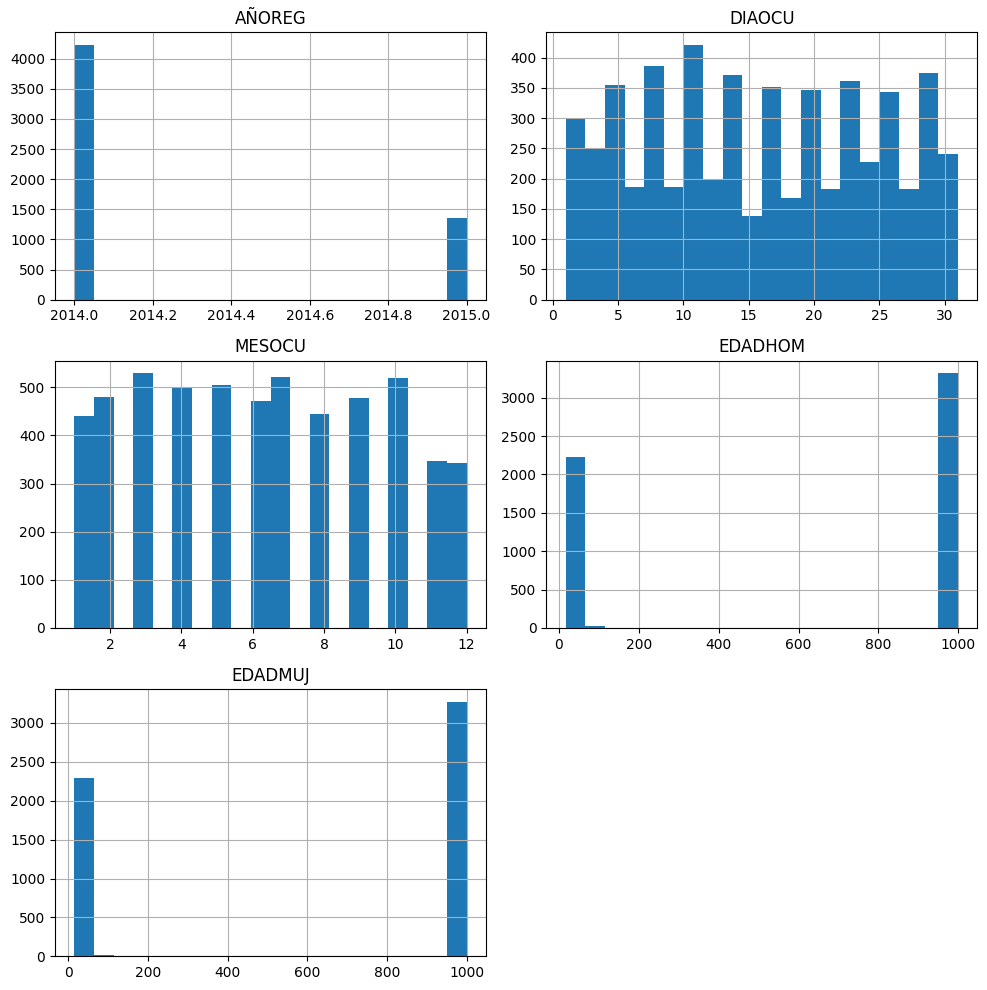

In [ ]:
plot_columns = [col for col in quantitative_columns if col in data.columns]

data[plot_columns].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

#### ¿Cuál es el propósito de hacer box plots?

<small>Los gráficos de caja muestran la distribución de datos numéricos y son especialmente buenos para identificar valores atípicos y entender la dispersión de los datos (mediante cuartiles y medianas). Este código crea un gráfico de caja para cada variable numérica, organizándolos en una matriz de gráficos para facilitar la comparación.</small>


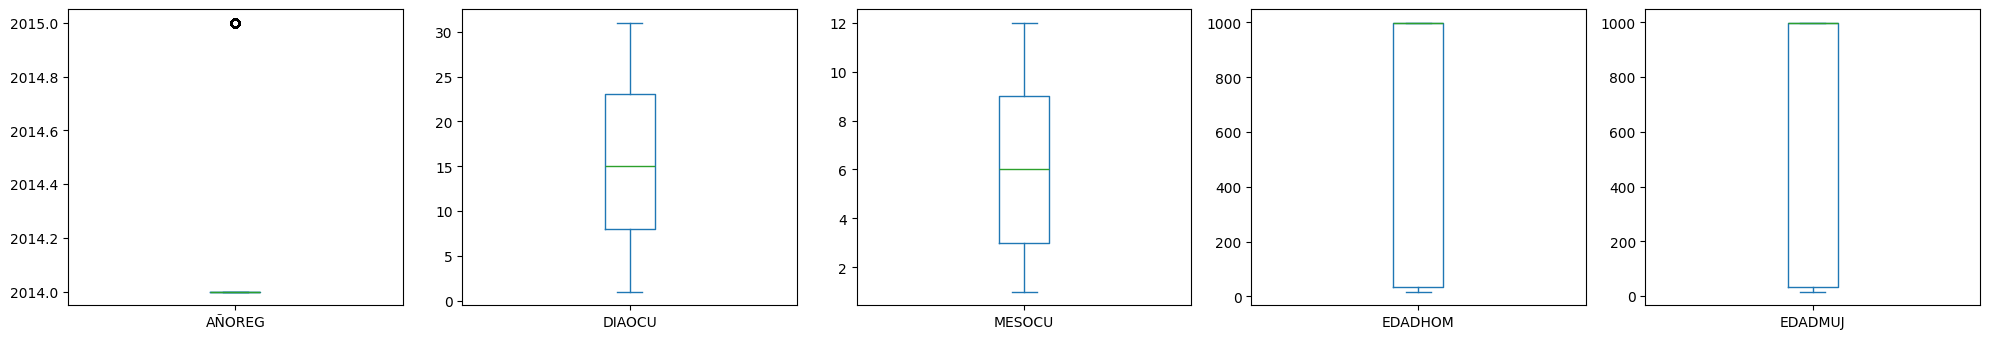

In [16]:
# Generar los box plots
plot_columns = [col for col in quantitative_columns if col in data.columns]
data[plot_columns].plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20))
plt.tight_layout()  # Ajusta el layout para evitar que los gráficos se sobrepongan
plt.show()

### Pruebas de Normalidad

--- AÑOREG ---


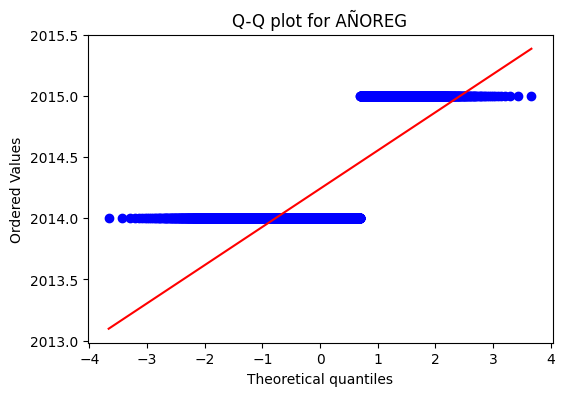

Kolmogorov-Smirnov Test for AÑOREG:
Statistic: 0.4720550130355011, p-value: 0.0 (La distribución no es normal)


--- DIAOCU ---


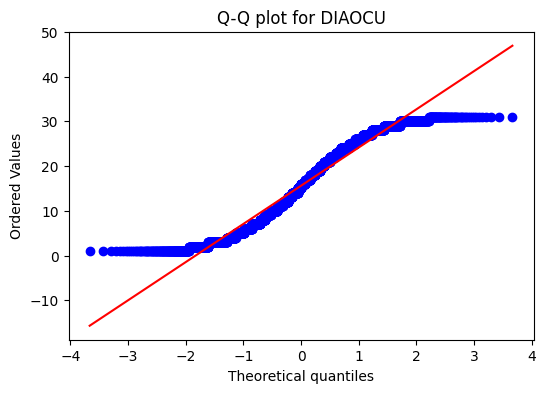

Kolmogorov-Smirnov Test for DIAOCU:
Statistic: 0.08097250021571839, p-value: 3.0414254456649596e-32 (La distribución no es normal)


--- MESOCU ---


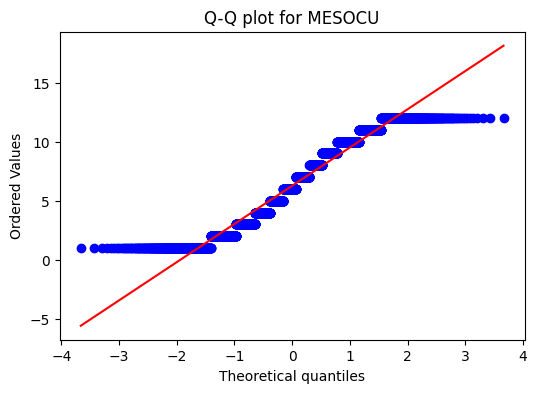

Kolmogorov-Smirnov Test for MESOCU:
Statistic: 0.10210658400402611, p-value: 4.6802712400676476e-51 (La distribución no es normal)


--- EDADHOM ---


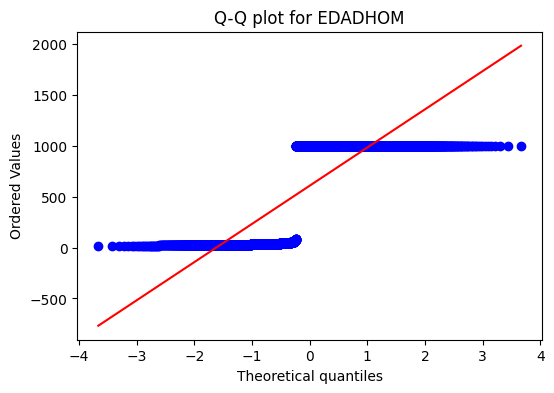

Kolmogorov-Smirnov Test for EDADHOM:
Statistic: 0.390267414600556, p-value: 0.0 (La distribución no es normal)


--- EDADMUJ ---


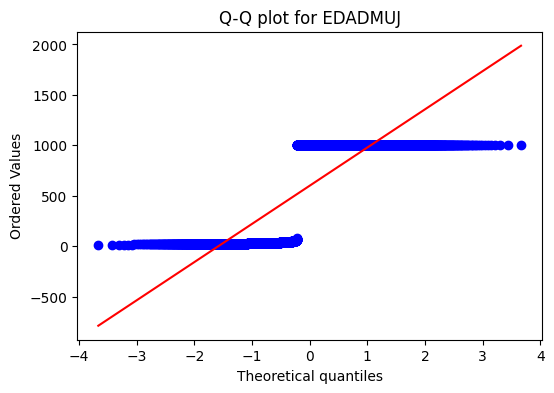

Kolmogorov-Smirnov Test for EDADMUJ:
Statistic: 0.3862108645618924, p-value: 0.0 (La distribución no es normal)




In [19]:
normality_plot_columns = [col for col in plot_columns if col in data.columns]

# Realizar pruebas de normalidad y graficar QQ plots
results = []
for column in normality_plot_columns:
    print(f"--- {column} ---")
    # QQ Plot
    fig = plt.figure(figsize=(6, 4))
    res = stats.probplot(data[column].dropna(), plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

    # Kolmogorov-Smirnov test for normality
    normed_data = (data[column].dropna() - data[column].mean()) / data[column].std()
    ks_test = stats.kstest(normed_data, 'norm')
    normality_text = "La distribución es normal" if ks_test.pvalue > 0.05 else "La distribución no es normal"
    print(f"Kolmogorov-Smirnov Test for {column}:\nStatistic: {ks_test.statistic}, p-value: {ks_test.pvalue} ({normality_text})\n\n")

    results.append((column, ks_test.statistic, ks_test.pvalue, normality_text))


### Tabla de Frecuencias de Variables Cualitativas

<small> En este apartado, se muestran las tablas de frecuencia para diversas variables cualitativas dentro del _dataset_. Estas tablas muestran la cantidad de veces que cada valor único aparece en el conjunto de datos, proporcionando una visión clara de la distribución y prevalencia de las características observadas. Este análisis ayuda a identificar tendencias, valores atípicos y posibles inconsistencias en los datos.

In [18]:
freq_table = {col: data[col].value_counts() for col in cualitative_columns}

for column, table in freq_table.items():
    print(f"Tabla de frecuencias para la variable: {column}")
    display(table.reset_index().head(30)) 
    print("\n")

Tabla de frecuencias para la variable: DEPREG


,DEPREG,count
0,1,2180
1,9,350
2,22,321
3,5,273
4,12,192
5,10,187
6,13,164
7,14,158
8,18,153
9,11,152




Tabla de frecuencias para la variable: MUPREG


,MUPREG,count
0,101,1774
1,901,134
2,115,119
3,2101,107
4,1001,99
5,1101,91
6,1301,90
7,2201,87
8,1801,83
9,1601,81




Tabla de frecuencias para la variable: MESREG


,MESREG,count
0,3,553
1,6,546
2,5,511
3,7,490
4,11,486
5,2,476
6,10,475
7,4,429
8,9,420
9,8,418




Tabla de frecuencias para la variable: DEPOCU


,DEPOCU,count
0,1,2044
1,9,370
2,22,344
3,5,291
4,12,212
5,10,206
6,13,170
7,18,163
8,20,162
9,14,161




Tabla de frecuencias para la variable: MUPOCU


,MUPOCU,count
0,101,1344
1,108,209
2,115,157
3,901,150
4,501,104
5,2201,99
6,920,91
7,1801,83
8,1301,79
9,1901,70




Tabla de frecuencias para la variable: PUEHOM


,PUEHOM,count
0,9,3528
1,4,1702
2,1,327
3,5,16
4,2,2




Tabla de frecuencias para la variable: PUEMUJ


,PUEMUJ,count
0,9,3502
1,4,1770
2,1,298
3,5,3
4,2,2




Tabla de frecuencias para la variable: NACHOM


,NACHOM,count
0,320,5472
1,9999,26
2,840,19
3,720,7
4,222,7
5,723,5
6,192,5
7,276,4
8,724,4
9,76,3




Tabla de frecuencias para la variable: NACMUJ


,NACMUJ,count
0,320,5466
1,9999,24
2,840,19
3,222,17
4,720,10
5,723,8
6,170,7
7,340,4
8,188,3
9,192,2




Tabla de frecuencias para la variable: ESCHOM


,ESCHOM,count
0,9,3202
1,1,780
2,4,708
3,2,393
4,5,251
5,3,238
6,6,3




Tabla de frecuencias para la variable: ESCMUJ


,ESCMUJ,count
0,9,3126
1,1,816
2,4,766
3,2,396
4,3,257
5,5,211
6,6,3




Tabla de frecuencias para la variable: CIUOHOM


,CIUOHOM,count
0,IGNORADO,1556
1,NEOG,1552
2,61,575
3,52,270
4,43,192
5,92,153
6,23,146
7,72,96
8,83,96
9,31,94




Tabla de frecuencias para la variable: CIUOMUJ


,CIUOMUJ,count
0,NEOG,2735
1,IGNORADO,1699
2,23,287
3,41,225
4,43,99
5,52,74
6,26,64
7,51,53
8,22,41
9,34,39


### Identificación de valores atípicos

In [25]:
# Función para identificar valores atípicos usando IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Aplicar detección de outliers
outliers_detectados = detectar_outliers_iqr(data, quantitative_columns)

# Unir los resultados en un solo DataFrame
outliers_df = pd.concat(outliers_detectados.values(), ignore_index=True)

# Guardar los valores atípicos en un archivo CSV
outliers_df.to_csv("valores_atipicos_divorcios.csv", index=False)

# Mostrar algunas filas con valores atípicos detectados
print(outliers_df.head())

   DEPREG  MUPREG  MESREG  AÑOREG  DIAOCU  MESOCU  DEPOCU  MUPOCU  EDADHOM  \
0       3     309       1    2015       7       8       3     309       30   
1       1     101       5    2015       5      12       1     101       48   
2       1     101       5    2015      17       9       1     101      999   
3       1     101       1    2015       4       9       1     101       42   
4       1     101       5    2015       6      11       1     101       30   

   EDADMUJ  PUEHOM  PUEMUJ  NACHOM  NACMUJ  ESCHOM  ESCMUJ   CIUOHOM CIUOMUJ  
0       27       9       9     124     320       1       1        52    NEOG  
1      999       4       9     156     320       4       1        52      51  
2      999       9       9     192     320       9       9        26      52  
3       34       9       4     208     320       1       5        52      52  
4       30       9       4     218     320       1       4  IGNORADO    NEOG  


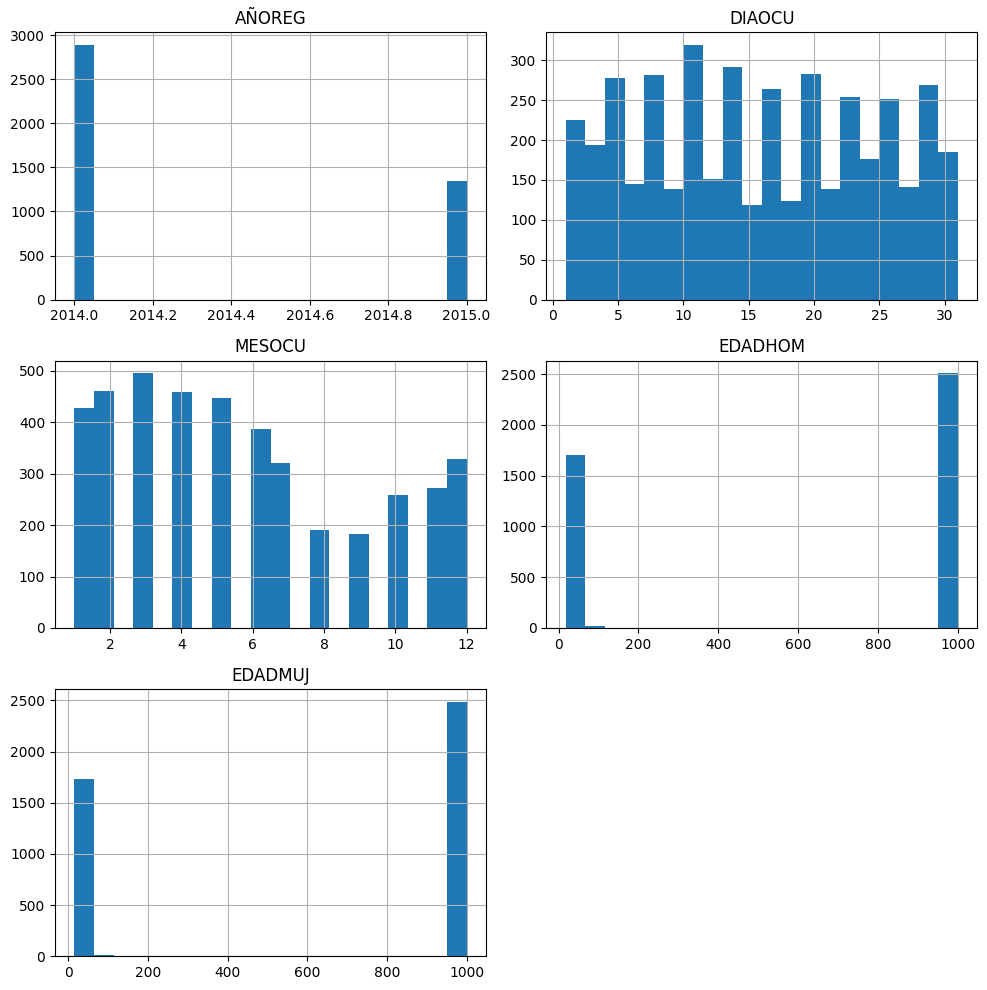

In [27]:
plot_columns = [col for col in quantitative_columns if col in data_cleaned.columns]

data_cleaned[plot_columns].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

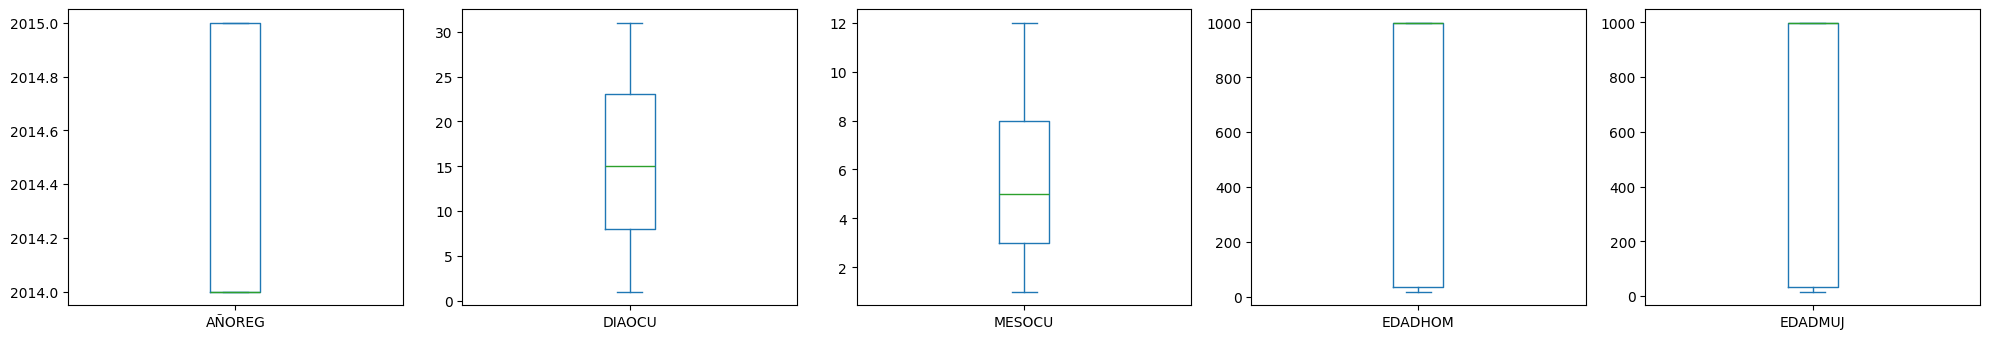

In [28]:
# Generar los box plots
plot_columns = [col for col in quantitative_columns if col in data_cleaned.columns]
data_cleaned[plot_columns].plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20))
plt.tight_layout()  # Ajusta el layout para evitar que los gráficos se sobrepongan
plt.show()

--- AÑOREG ---


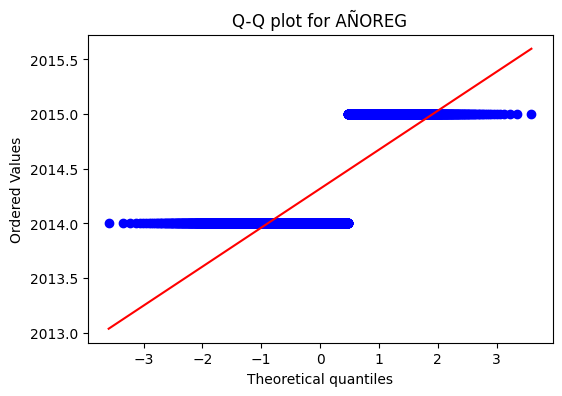

Kolmogorov-Smirnov Test for AÑOREG:
Statistic: 0.43511931020092237, p-value: 0.0 (La distribución no es normal)


--- DIAOCU ---


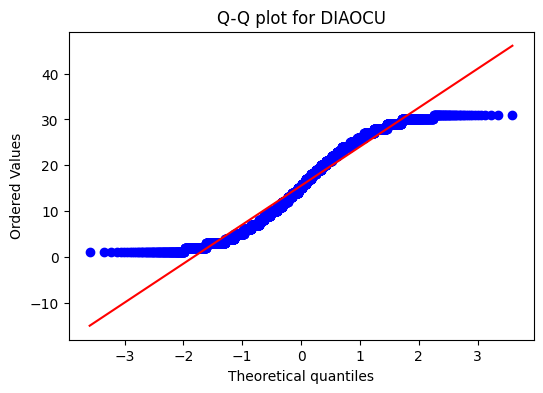

Kolmogorov-Smirnov Test for DIAOCU:
Statistic: 0.07908516623251644, p-value: 1.9224407418902535e-23 (La distribución no es normal)


--- MESOCU ---


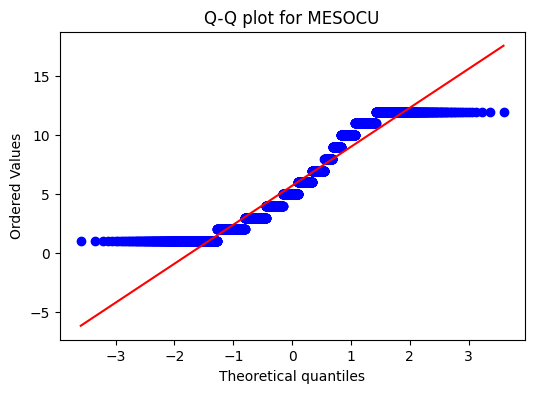

Kolmogorov-Smirnov Test for MESOCU:
Statistic: 0.12650161191691156, p-value: 2.0064457970118833e-59 (La distribución no es normal)


--- EDADHOM ---


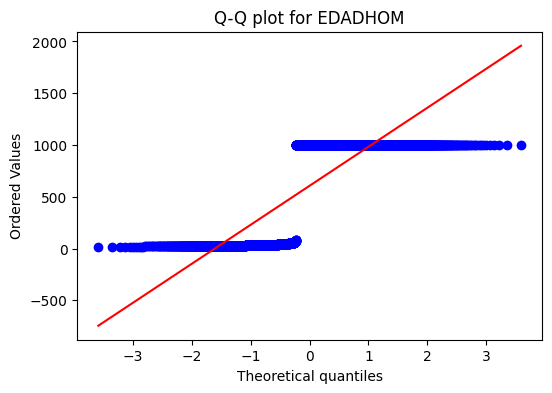

Kolmogorov-Smirnov Test for EDADHOM:
Statistic: 0.3892911509316043, p-value: 0.0 (La distribución no es normal)


--- EDADMUJ ---


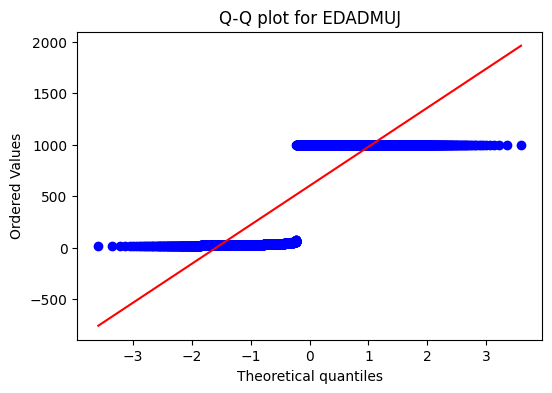

Kolmogorov-Smirnov Test for EDADMUJ:
Statistic: 0.3869819004323532, p-value: 0.0 (La distribución no es normal)




In [29]:
normality_plot_columns = [col for col in plot_columns if col in data_cleaned.columns]

# Realizar pruebas de normalidad y graficar QQ plots
results = []
for column in normality_plot_columns:
    print(f"--- {column} ---")
    # QQ Plot
    fig = plt.figure(figsize=(6, 4))
    res = stats.probplot(data_cleaned[column].dropna(), plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

    # Kolmogorov-Smirnov test for normality
    normed_data = (data_cleaned[column].dropna() - data_cleaned[column].mean()) / data_cleaned[column].std()
    ks_test = stats.kstest(normed_data, 'norm')
    normality_text = "La distribución es normal" if ks_test.pvalue > 0.05 else "La distribución no es normal"
    print(f"Kolmogorov-Smirnov Test for {column}:\nStatistic: {ks_test.statistic}, p-value: {ks_test.pvalue} ({normality_text})\n\n")

    results.append((column, ks_test.statistic, ks_test.pvalue, normality_text))
